
<h2><center> Taller 6 ETI195 - Modelos Interpretables </center></h2>

En este taller veremos qué es la interpretabilidad en modelos de ML, particularmente el objetivo de este taller es introducir la interpretabilidad en modelos inherentemente interpretables, como es el caso de los árboles de decisión y la regresión logística.



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Contexto
Debido al gran éxito de los modelos de Machine Learning, ha habido un creciente interés en aprovechar estos modelos para ayudar a tomadores de decisiones en dominios tan críticos como la salud o la justicia criminal. La adopción existosa de estos modelos en las aplicaciones específicas de cada campo depende de qué tan bien los tomadores de deciciones son capaces de entender y confiar en el funcionamiento de estos [1]. Es aquí donde aparece el concepto de interpretabilidad, que refiere al grado o nivel en que un humano puede entender la causa de una decisión (predicción). Es decir, la interpretabilidad se relaciona con la facilidad para comprender el por qué de las predicciones de un modelo.

Es en este contexto que surgen 2 conceptos para distinguir modelos según su nivel de interpretabilidad:

- **White Box Models**: Corresponden a aquellos modelos en los que resulta relativamente fácil interpretar y explicar sus predicciones. Generalmente decimos que estos modelos son inherentemente interpretables. Entre estos modelos encontramos la regresión lineal, la regresión logística y los árboles de decisión.

- **Black Box Models**: Por el contrario, los modelos de caja negra son aquellos que resulta dificil explicar sus predicciones, generalmente al tratarse de modelos más complejos.

También, surgen los conceptos de interpretabilidad local e interpretabilidad global.

- **Interpretabilidad global**: Se refiere a la capacidad de explicar el funcionamiento del modelo y las predicciones en su conjunto, sin enfocarse en una predicción en particular.

- **Interpretabilidad local**: Se refiere a la capacidad de entender la relación entre los componentes o atributos de una instancia en particular y la predicción del modelo para esa instancia.

En este tutorial estaremos trabajando estos conceptos utilizando el UCI ML Breast Cancer Wisconsin (Diagnostic) dataset, en particular la versión provista por sklearn en sus 'toy datasets'. La información que se entrega sobre estos datos es la siguiente:

**ATRIBUTOS**:

- radius (mean of distances from center to points on the perimeter)

- texture (standard deviation of gray-scale values)

- perimeter

- area

- smoothness (local variation in radius lengths)

- compactness (perimeter^2 / area - 1.0)

- concavity (severity of concave portions of the contour)

- concave points (number of concave portions of the contour)

- symmetry

- fractal dimension (“coastline approximation” - 1)

The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.


Utilizaremos un árbol de decisión para hacer clasificaciones benigno/maligno.

In [2]:
# Cargamos los datos directamente desde sklearn.
data = load_breast_cancer(as_frame=True)
X, y = data.data, data.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [5]:
# Separamos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# Entrenamos
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [7]:
# Accuracy en datos de prueba.
dt.score(X_test, y_test)

0.8811188811188811

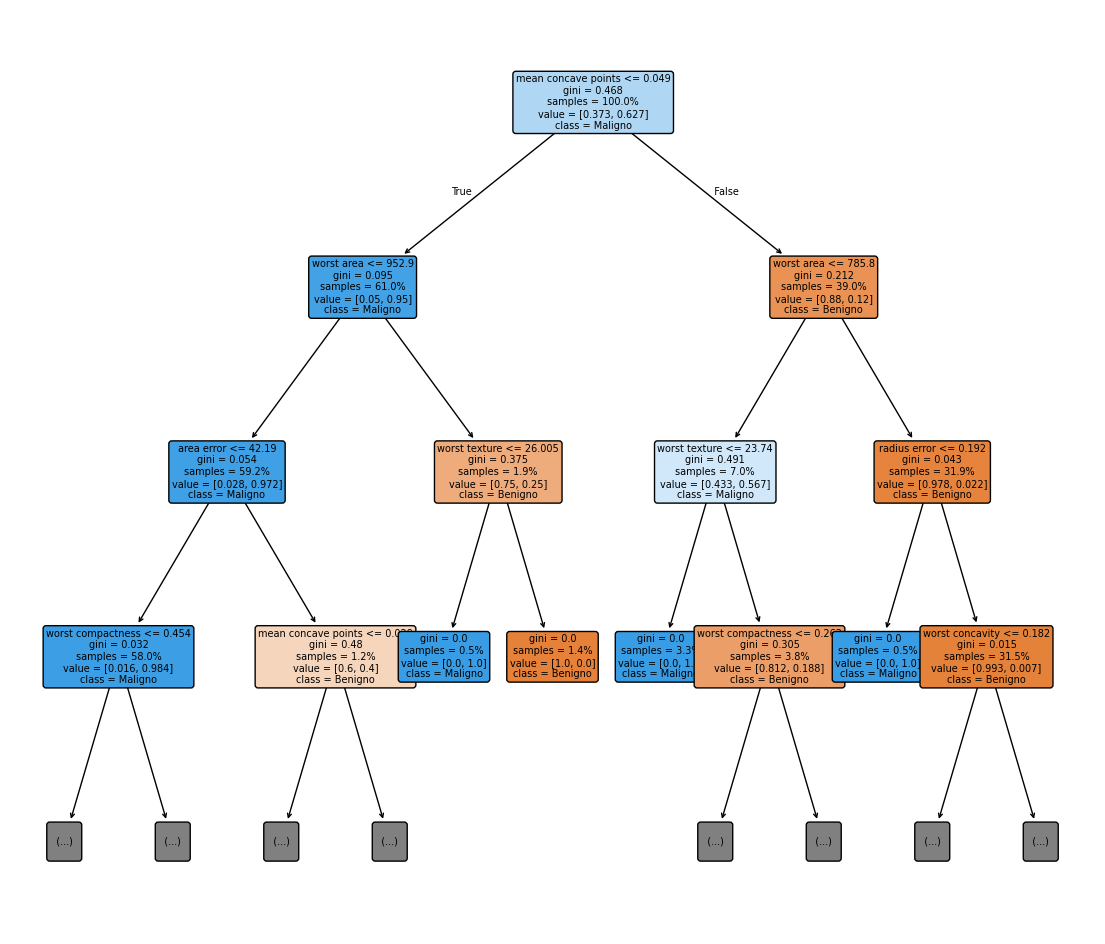

In [8]:
fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(dt, feature_names = data.feature_names,
               class_names = ['Benigno', 'Maligno'], max_depth=3,
               proportion=True, filled=True, rounded=True, fontsize=7, ax=ax)
plt.show()

In [9]:
dt.feature_importances_

array([0.        , 0.0096886 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71160121, 0.        , 0.        ,
       0.01948008, 0.        , 0.        , 0.01676117, 0.017502  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06706044, 0.        , 0.11373562, 0.        ,
       0.03421113, 0.00995974, 0.        , 0.        , 0.        ])

In [10]:
dt_importance_sorted_idx = np.argsort(dt.feature_importances_)


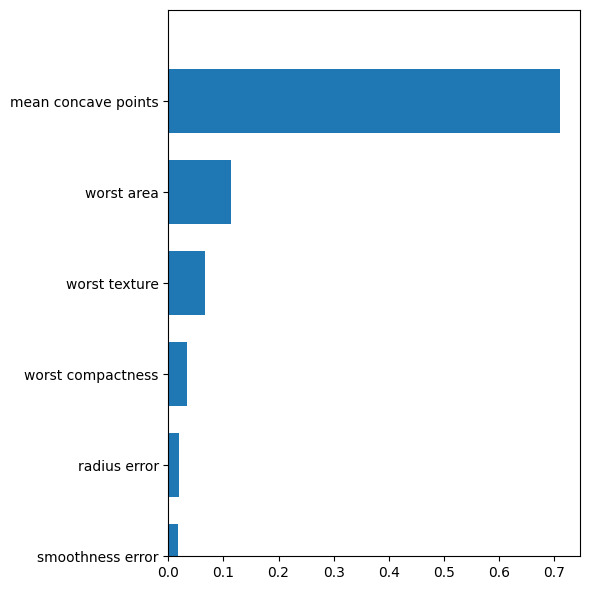

In [11]:
fig, ax = plt.subplots(1, figsize=(6, 6))

ax.barh(range(0, 6), dt.feature_importances_[dt_importance_sorted_idx][-6:], height=0.7)
ax.set_yticks(range(0, 6))
ax.set_yticklabels(data.feature_names[dt_importance_sorted_idx][-6:])
ax.set_ylim((0, len(dt.feature_importances_[-6:])))

fig.tight_layout()
plt.show()

En este caso, los atributos más importantes son aquellos atributos que provocan la mayor disminución del gini score.

## B. Interpretabilidad de la regresión logística.

Recordemos que para el caso de la regresión logística, las probabilidades de pertenecer a la clase Y=1 se obtienen ajustando la siguiente ecuación:

$P(Y=1) = \frac{1}{1+exp(-(\beta_0 + \beta_1x_1 + ... + \beta_mx_m))}$

donde $m$ es el total de atributos, $x_i$ es cada uno de los atributos y $\beta_i$ el coeficiente que acompaña a dicho atributo. Tomando en consideración lo anterior, se puede llegar a la siguiente expresión:

$\frac{P(Y=1)}{1-P(Y=1)} = exp(\beta_0 + \beta_1x_1 + ... + \beta_mx_m) \text{   (odds)}$

o equivalentemente

$\ln(\frac{P(Y=1)}{P(Y=0)}) = \beta_0 + \beta_1x_1 + ... + \beta_mx_m       \text{   (log odds)}$

Si mantenemos los valores de las variables fijas y variamos solo una de ellas, digamos $x_j$ en una unidad, tenemos que:

$\frac{\text{odds}(x_j+1)}{\text{odds}(x_j)} = \frac{exp(\beta_0 + \beta_1x_1 + ... \beta_j(x_j + 1) + ... + \beta_mx_m)}{exp(\beta_0 + \beta_1x_1 + ... \beta_j(x_j)+ \beta_mx_m)} = exp(\beta_j)$

In [12]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.060,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.980,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.500,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [13]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [14]:
lr.score(X_test, y_test)

0.958041958041958

In [15]:
lr.coef_

array([[ 1.72212261,  0.08981214,  0.10599932, -0.00713514, -0.12840826,
        -0.33349166, -0.49935225, -0.26507729, -0.26760528, -0.0214943 ,
         0.03647219,  0.98651772,  0.11708925, -0.10871689, -0.00796626,
         0.01056408, -0.02918357, -0.02818239, -0.03431296,  0.00856833,
         1.35829649, -0.28904136, -0.2498355 , -0.02012361, -0.21696311,
        -1.02744299, -1.44793078, -0.53377123, -0.648555  , -0.10913176]])

In [16]:
df = pd.DataFrame(index=X.columns, columns=['Coeficiente', 'Odds Ratio'])
df['Coeficiente'] = lr.coef_[0]
df['Odds Ratio'] = np.exp(lr.coef_[0])
df.sort_values('Odds Ratio', ascending=True)

,Coeficiente,Odds Ratio
worst concavity,-1.447931,0.235056
worst compactness,-1.027443,0.357921
worst symmetry,-0.648555,0.522801
worst concave points,-0.533771,0.586389
mean concavity,-0.499352,0.606924
mean compactness,-0.333492,0.716418
worst texture,-0.289041,0.748981
mean symmetry,-0.267605,0.765210
mean concave points,-0.265077,0.767147
worst perimeter,-0.249835,0.778929


## C. Interpretabilidad global de otros modelos usando Decision Tree (Surrogate Model o Modelo Sustituto).

In [17]:
from sklearn.svm import SVC

In [18]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [19]:
svm.score(X_test, y_test)

0.9370629370629371

In [20]:
prediction = svm.predict(X_train)

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, prediction)

DecisionTreeClassifier()

In [22]:
dt_importance_sorted_idx = np.argsort(dt.feature_importances_)
tree_indices = np.arange(0, len(dt.feature_importances_))

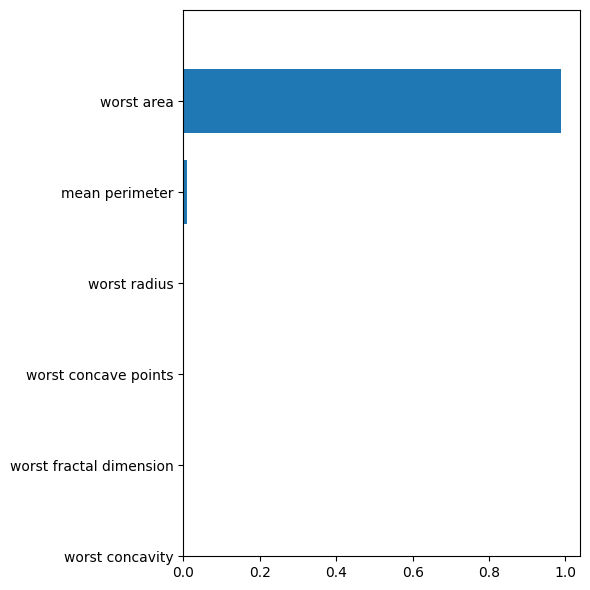

In [23]:
fig, ax = plt.subplots(1, figsize=(6, 6))

ax.barh(range(0, 6), dt.feature_importances_[dt_importance_sorted_idx][-6:], height=0.7)
ax.set_yticks(range(0, 6))
ax.set_yticklabels(data.feature_names[dt_importance_sorted_idx][-6:])
ax.set_ylim((0, len(dt.feature_importances_[-6:])))

fig.tight_layout()
plt.show()

In [24]:
dt.feature_importances_[dt_importance_sorted_idx][-6:]

array([0.        , 0.        , 0.        , 0.00187671, 0.00957183,
       0.98855146])

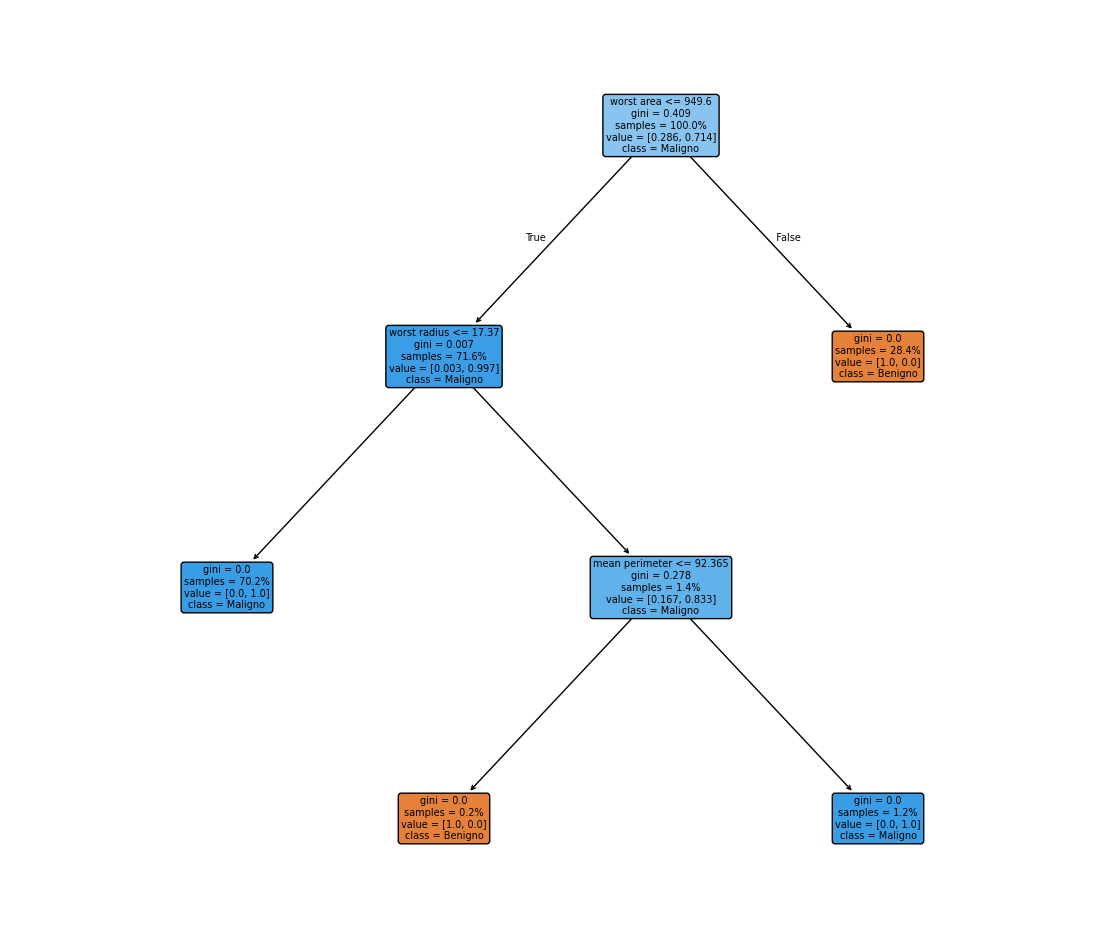

In [25]:
fig, ax = plt.subplots(1, figsize=(14, 12))
tree.plot_tree(dt, feature_names = data.feature_names,
               class_names = ['Benigno', 'Maligno'], max_depth=3,
               proportion=True, filled=True, rounded=True, fontsize=7, ax=ax)
plt.show()

## Referencias.

[1] Slack, D., Hilgard, S., Jia, E., Singh, S., & Lakkaraju, H. (2019). Fooling LIME and SHAP:  Adversarial Attacks on Post hoc Explanation Methods. Proceedings of the AAAI/ACM  Conference on AI, Ethics, and Society.